In [1]:
%autosave 60

Autosaving every 60 seconds


In [2]:
# to connectto Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%matplotlib inline
import pandas as pd # for using pandas daraframe
import numpy as np # for som math operations
from numpy import load
from numpy import save
from sklearn.decomposition import PCA # for PCA calculation
import matplotlib.pyplot as plt # for plotting
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import seaborn as sb
from collections import Counter
import time
# For plotting
import plotly.io as plt_io
import plotly.graph_objects as go
from plotly.validators.scatter.marker import SymbolValidator


In [4]:
#Funcion para graficar en 2D y 3D
def plot_2d(component1, component2):
    fig = go.Figure(data=go.Scatter(
        x = component1,
        y = component2,
        text="{ "+df["City"]+" : " + df["Date"]+" }",
        mode='markers',
        marker=dict(
            size=5,
            color=labels, #set color equal to a variable
            colorscale='Rainbow', # one of plotly colorscales
            showscale=False,
            line_width=1,
        
        )
    ))
    fig.update_layout(xaxis_title='Componente 1',
                    yaxis_title='Componente 2',
                    margin=dict( l=100,r=100,b=100,t=100))                 
    fig.layout.template = 'seaborn'
    fig.show()

def plot_3d(component1,component2,component3):
    fig = go.Figure(data=[go.Scatter3d(
        x=component1,
        y=component2,
        z=component3,
        text="{ "+df["City"]+" : " + df["Date"]+" }",
        mode='markers',
        marker=dict(
            size=5,
            color=labels,                # set color to an array/list of desired values
            colorscale='Rainbow',   # choose a colorscale
            opacity=1,
            line_width=1
        )
    )])
    # tight layout
    fig.update_layout(scene = dict(xaxis_title='Componente 1',
                    yaxis_title='Componente 2',
                    zaxis_title='Componente 3'),
                    margin=dict(l=25,r=25,b=25,t=25))
    fig.layout.template = 'seaborn'
    
    fig.show()

In [5]:
## Cargando cvs
path = "/content/drive/MyDrive/CURSOS UNSA/Proyecto final de tesis/Avances Proyecto/Tesis_code/"

In [6]:
## defining constants
PATH = path+"india_2015_2020.csv"

dataset = pd.read_csv(PATH)
df = dataset.copy()

In [7]:
#Generando 
X_data = df.drop(columns=['City','AQI','AQI_Bucket','AQI','AQI_range'], inplace=False)
X_data.set_index('Date', inplace=True)


Y_labels = df.drop(columns=['Date','City','PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3','AQI'], inplace=False)

In [8]:
X_data

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3
Date,,,,,,,,,
2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68
2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97
2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71
2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36
2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20
...,...,...,...,...,...,...,...,...,...
2020-07-01,17.50,30.48,3.95,13.25,14.83,7.42,0.54,6.66,15.40
2020-07-01,57.67,100.99,32.81,15.11,30.20,17.73,0.59,3.48,16.48
2020-07-01,22.00,34.00,1.50,9.68,6.40,8.45,0.59,10.88,29.15


In [9]:
Y_labels.value_counts()

AQI_Bucket  AQI_range
yellow      1            5960
orange      2            5946
red         3            1494
green       0            1170
purple      4             910
maroon      5             312
dtype: int64

In [10]:
# Dividiendo los datos y etiquetas
labels = Y_labels.loc[:,'AQI_Bucket'].values
data = X_data.loc[:,'PM2.5':].values

In [11]:
data.shape

(15792, 9)

In [12]:
# load components to PCA.ipynb
principalComponents = load(path+'umap_3.npy')
# print the array
print(principalComponents)

[[-2.1257942   6.1278405   8.095993  ]
 [ 0.43579215  8.114891    7.6960025 ]
 [ 4.0662484   8.8031845   8.537856  ]
 ...
 [11.81446     3.9680357  10.544302  ]
 [ 7.4482355   8.4128     11.723478  ]
 [10.000739    6.094769    9.251061  ]]


# Kmeans with PCA

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

### Obtener el valor K adecuado

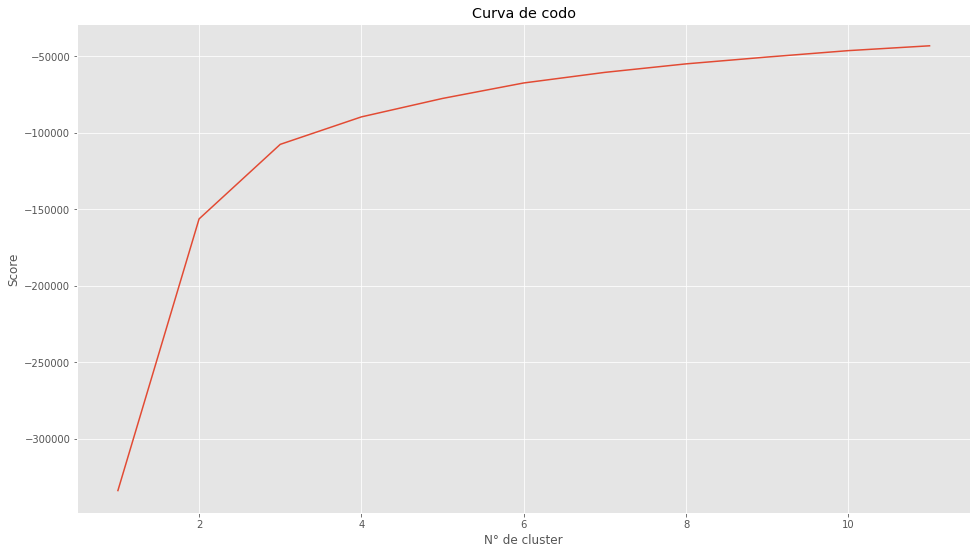

In [14]:
Nc = range(1, 12)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score1 = [kmeans[i].fit(principalComponents).score(principalComponents) for i in range(len(kmeans))]
score1
plt.plot(Nc,score1)
plt.xlabel('N° de cluster')
plt.ylabel('Score')
plt.title('Curva de codo')
plt.show()

Ejecutamos el algoritmo para 5 clusters y obtenemos los centroids.

In [15]:
kmeans_pca = KMeans(n_clusters=5).fit(principalComponents)
centroids = kmeans_pca.cluster_centers_
centroids

array([[ 8.127541  ,  8.807892  , 10.019112  ],
       [ 0.56382227,  8.304404  ,  8.741353  ],
       [10.0204735 ,  6.6018596 ,  7.8283777 ],
       [11.284277  ,  4.849331  , 10.28186   ],
       [ 4.6490464 ,  9.657522  ,  9.042416  ]], dtype=float32)

In [16]:
# Predecir los clústeres
labels = kmeans_pca.predict(principalComponents)
# Conseguir los centros de clúster
C = kmeans_pca.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

In [17]:
fig = go.Figure()
fig.add_trace(
    go.Scatter3d(
    x=principalComponents[:, 0],
    y=principalComponents[:, 1],
    z=principalComponents[:, 2],
    mode='markers',
    marker=dict(
        size=3,
        color=asignar,                
        colorscale='Rainbow',   
        opacity=.2,
        ),
        name="Datos"
    )    
)
fig.add_trace(
    go.Scatter3d(
    x=C[:, 0],
    y=C[:, 1],
    z=C[:, 2],
    mode='markers',
    marker=dict(
        symbol='x',
        size=6,
        color=colores,                
        colorscale='Rainbow',   
        opacity=1,
        line_width=3),
    name="Centroides"
    )
)

# tight layout
fig.update_layout(scene = dict(xaxis_title='Componente 1',
                    yaxis_title='Componente 2',
                    zaxis_title='Componente 3'),margin=dict(l=50,r=50,b=50,t=50))
fig.layout.template = 'seaborn'
fig.show()

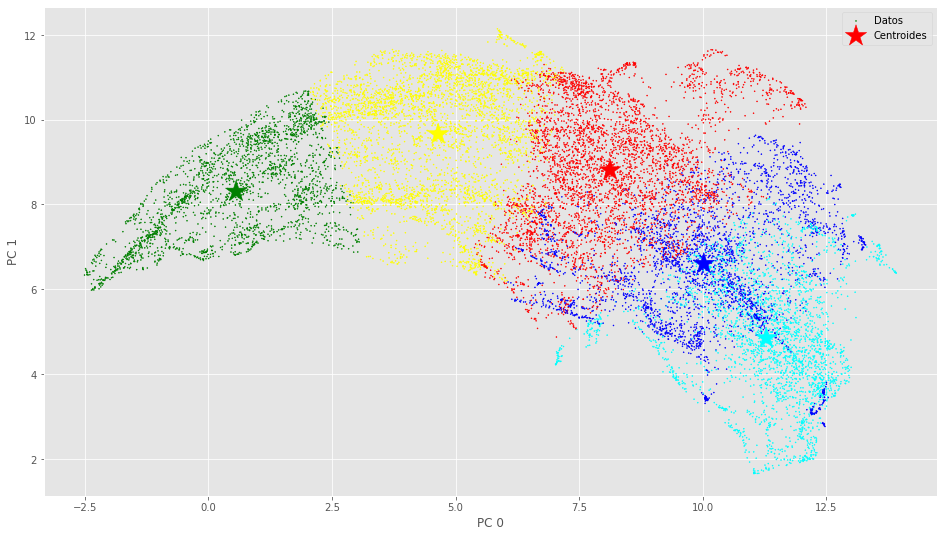

In [18]:
# Componente 0 y 1
f1 = principalComponents[:, 0]
f2 = principalComponents[:, 1]

plt.scatter(f1, f2, c=asignar, s=1,label="Datos")
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=500,label="Centroides")
plt.xlabel('PC 0')
plt.ylabel('PC 1')
plt.legend()
plt.show()

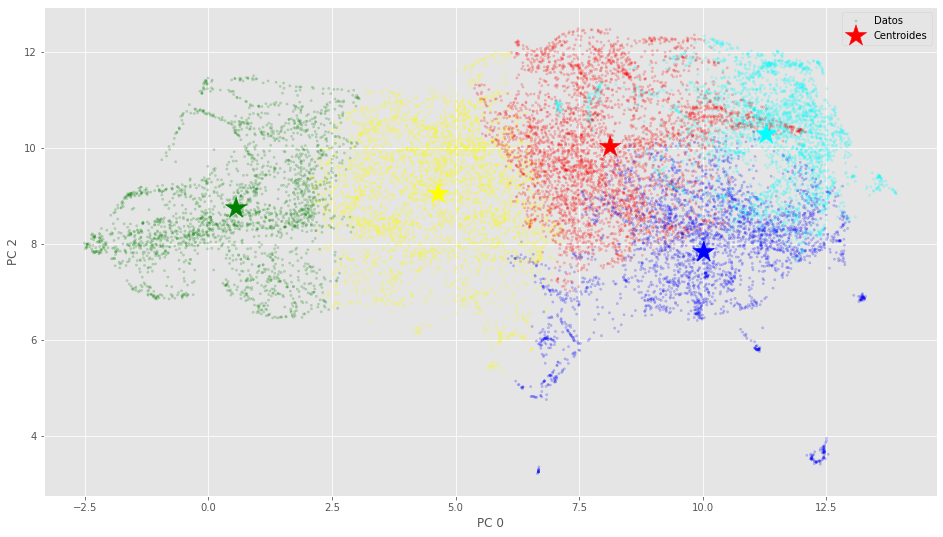

In [19]:
# Componente 0 y 2
f1 = principalComponents[:, 0]
f2 = principalComponents[:, 2]

plt.scatter(f1, f2, c=asignar, s=5,alpha=0.2,label="Datos")
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=500, label = "Centroides")
plt.xlabel('PC 0')
plt.ylabel('PC 2')
plt.legend()
plt.show()

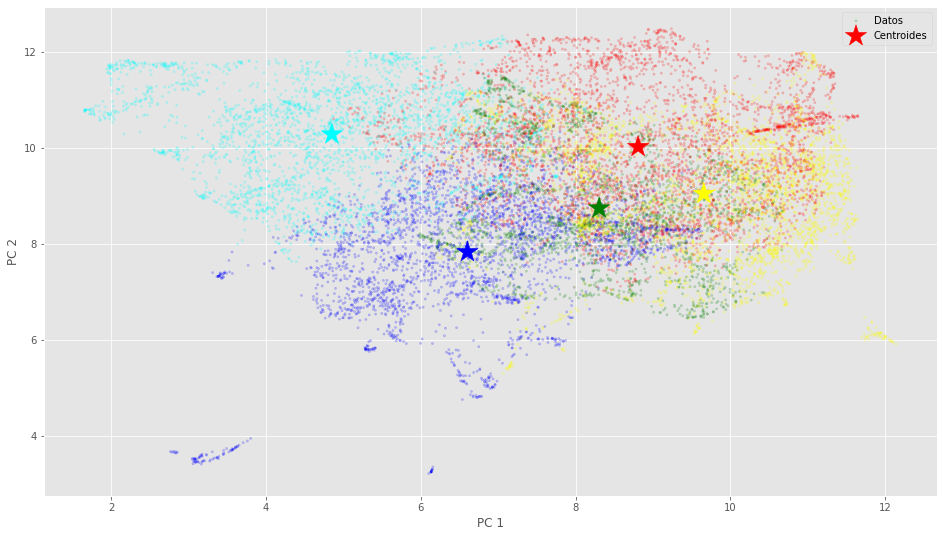

In [20]:
# Componente 1 y 2
f1 = principalComponents[:, 1]
f2 = principalComponents[:, 2]

plt.scatter(f1, f2, c=asignar, s=5,alpha=0.2,label="Datos")
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=500, label="Centroides")
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()

# Clustering Jerárquico Aglomerante - PCA

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



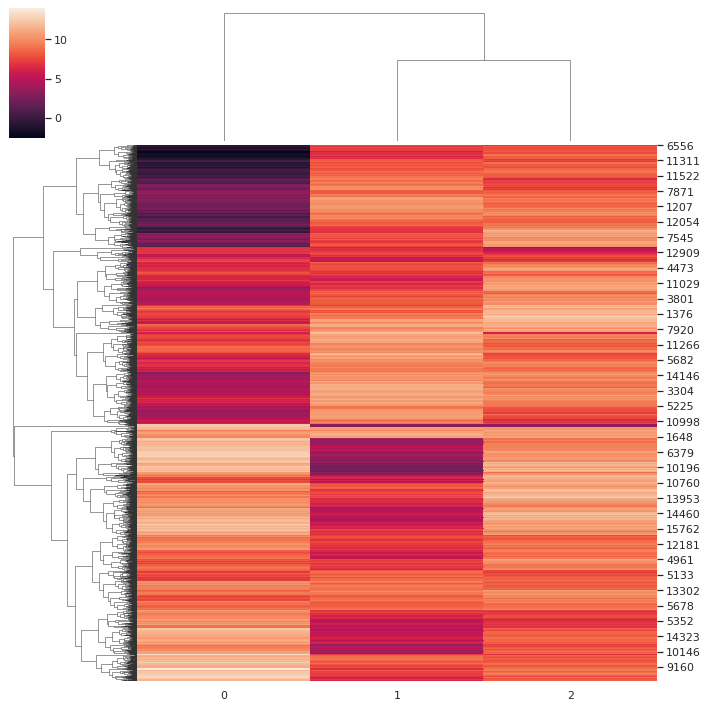

In [28]:
#dendograma
sb.set(style="darkgrid")
sb.clustermap(principalComponents)

Es una aproximación de abajo hacia arriba (bottom-up) donde se dividen los clusters en subclusters y así sucesivamente. Iniciando asignando cada muestra simple a un cluster y en cada iteración sucesiva va aglomerando (mezclando) el par de closters más cercanos satisfaciendo algún criterio de similaridad, hasta que todos los elementos pertenecen a un solo cluster.

El proceso de cluster aglomerante es el siguiente:

--> Primero asigna cada elemento a un cluster

--> Después encuentra la matriz de distancias

--> Encuentra 2 clusters que tengan la distancia más corta y los mezcla

--> Continua este proceso hasta que se forma un solo cluster grande

In [29]:
X = principalComponents[:,[0,1]]

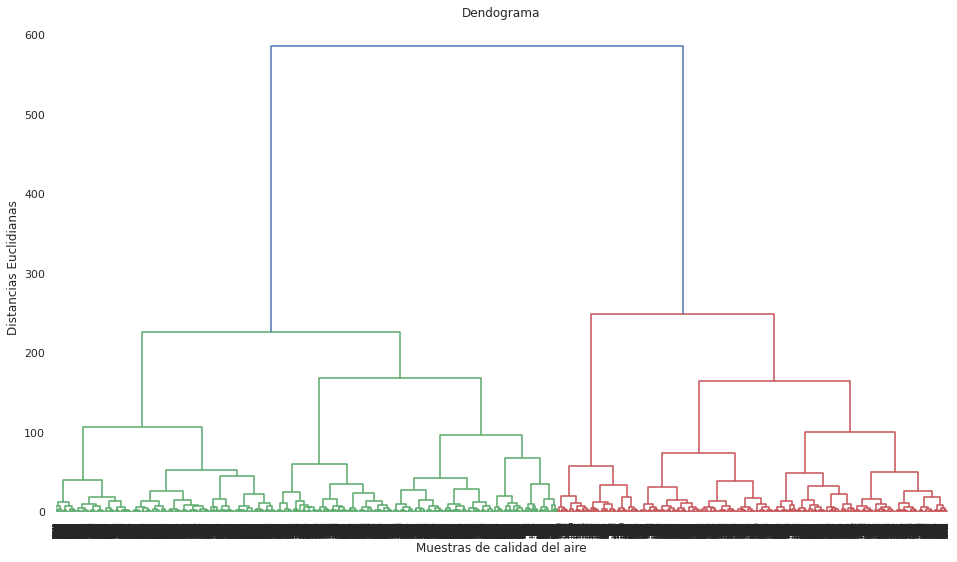

In [30]:
# Creamos el dendograma para encontrar el número óptimo de clusters

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendograma')
plt.xlabel('Muestras de calidad del aire')
plt.ylabel('Distancias Euclidianas')
plt.show()

In [31]:
# Ajustando Clustering Jerárquico al conjunto de datos
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, 
                    affinity = 'euclidean', 
                    linkage = 'ward')

y_hc = hc.fit_predict(X)

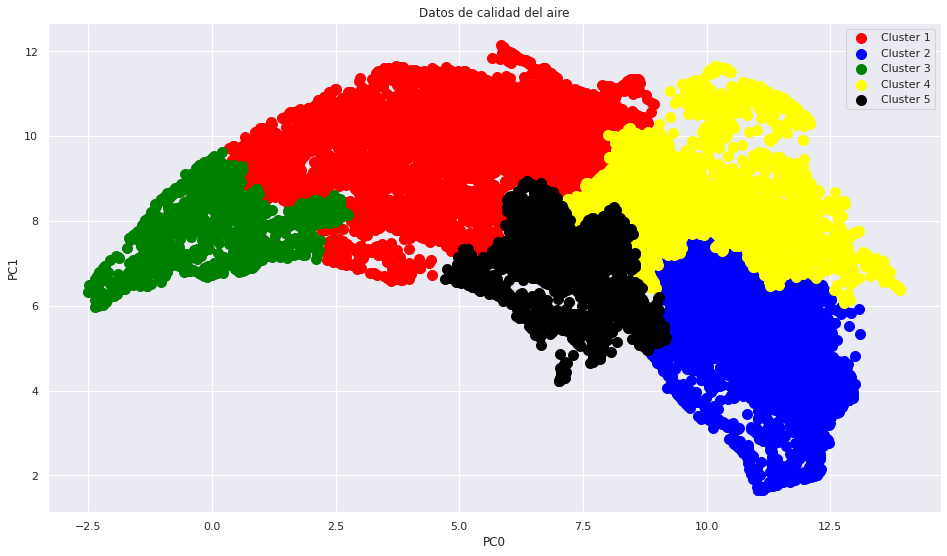

In [32]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'black', label = 'Cluster 5')
plt.title('Datos de calidad del aire')
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.legend()
plt.show()